## Problem 3: A charge coming to a sudden stop

A charge is initially moving with constant speed v=0.5c along the x direction. At time $t = 0$, the charge starts to decelerate at a constant rate. After 1 ns, the charge completely stops. Plot out the electric field of the charge on the xz plane at different times and make an animation. Is your finding consistent with your expectation?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycharge as pc
import matplotlib
import warnings
warnings.filterwarnings("ignore")  # suppress warnings

In [2]:
c = 3e8 #speed of light 
lim = 5.0 #grid limit is -5 to 5 
grid_size = 1000
x0=np.linspace(-lim, lim, grid_size)
x, y, z = np.meshgrid(x0, 0, x0, indexing='ij')
v=0.5*c # velocity of the particle
tmax=1E-9 #maximum time 
n_frame=50 #number of frames to make an animation 
dt=tmax/n_frame #change in time process

In [7]:
charge = pc.LinearDeceleratingCharge(True, -0.1*c, v, 1E-9)
simulation = pc.Simulation(charge)

In [16]:
#plotting one frame
i=50
t=i*dt #initial time (0)
E_total = simulation.calculate_E(t=t, x=x, y=y, z=z, pcharge_field='Total') #calculates the total electric field at time t
Ex = E_total[0][:, 0, :] 
Ey = E_total[1][:, 0, :]
Ez = E_total[2][:, 0, :]
Enorm=np.sqrt(Ex**2+Ey**2+Ez**2)

TypeError: 'numpy.float64' object does not support item assignment

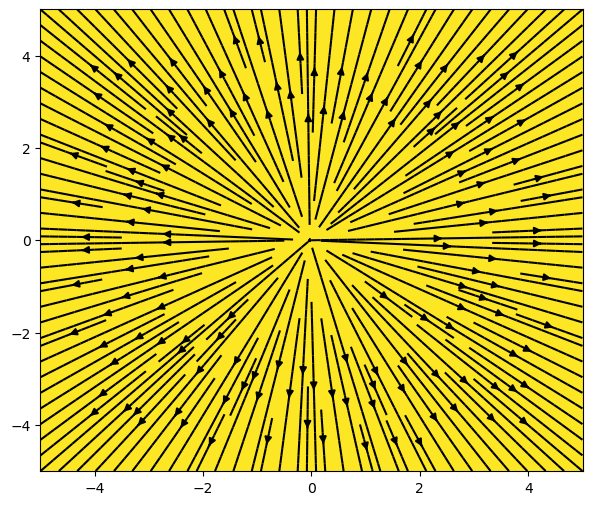

In [17]:
fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11 
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')

In [4]:


fig=plt.figure(figsize=(7,6))
ax=fig.add_subplot(111)
vmin=1e-11 
vmax=1e-8
im = ax.pcolormesh(x0,x0,Enorm.T,norm=matplotlib.colors.LogNorm(vmin=vmin,vmax=vmax))
stm = plt.streamplot(x0,x0,Ex.T,Ez.T,density=2,color='k')
# step=40
# Q = ax.quiver(x0[::step], x0[::step],
#               np.transpose(Ex[::step, ::step]/Enorm[::step,::step]), np.transpose(Ez[::step, ::step]/Enorm[::step,::step]), scale_units='xy')
pos = ax.scatter(charge.xpos(t), 0, s=20, c='red', marker='o')
ax.set_aspect('equal')
plt.xlabel("x")
plt.ylabel("z")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.05)
plt.colorbar(im, cax=cax)
plt.title('E')
plt.show()

TypeError: 'float' object is not callable